# AIML CA1 Part B 

# Imports 

In [1]:
import pandas as pd
import math
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error
from pandas import get_dummies
from sklearn.model_selection import GridSearchCV

# random state 
import random
random.seed(43)

# ignore warnings 
import warnings
warnings.filterwarnings("ignore")

# importing models 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor 

# dummy
from sklearn.dummy import DummyRegressor

# 1) Loading Data

In [2]:
# import housing_price_data.csv 
housingPrice = pd.read_csv('housing_price_data.csv')

# 2) Analyzing Data

In [3]:
# show the dataset basic information 
housingPrice.info()
# we see that not all columns are in either int or float, so we need to encode them later on

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   House ID           545 non-null    int64  
 1   City               545 non-null    object 
 2   House Area (sqm)   545 non-null    float64
 3   No. of Bedrooms    545 non-null    int64  
 4   No. of Toilets     545 non-null    int64  
 5   Stories            545 non-null    int64  
 6   Renovation Status  545 non-null    object 
 7   Price ($)          545 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 34.2+ KB


In [4]:
# display basic statistics
housingPrice.describe()
# we see that there is 545 rows of data and some other information about the data in each column

,House ID,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Price ($)
count,545.00000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,272.00000,515.054128,2.965138,1.286239,1.805505,4.766729e+05
std,157.47222,217.014102,0.738064,0.502470,0.867492,1.870440e+05
min,0.00000,165.000000,1.000000,1.000000,1.000000,1.750000e+05
25%,136.00000,360.000000,2.000000,1.000000,1.000000,3.430000e+05
50%,272.00000,460.000000,3.000000,1.000000,2.000000,4.340000e+05
75%,408.00000,636.000000,3.000000,2.000000,2.000000,5.740000e+05
max,544.00000,1620.000000,6.000000,4.000000,4.000000,1.330000e+06


In [5]:
# number of data 
housingPrice.shape
# checked that there is 545 rows of data with 8 columns

(545, 8)

In [6]:
# first 10 rows of data 
housingPrice.head(10)
# there is one column which does not provide useful information : ‘House ID’ , which is only used for identifying houses
# we can also see that ‘City’ and ‘Renovation Status’ are in string so we have to change them into intergers.

,House ID,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($)
0,0,Chicago,742.0,4,2,3,furnished,1330000
1,1,Denver,896.0,4,4,4,furnished,1225000
2,2,Chicago,996.0,3,2,2,semi-furnished,1225000
3,3,Seattle,750.0,4,2,2,furnished,1221500
4,4,New York,742.0,4,1,2,furnished,1141000
5,5,Boston,750.0,3,3,1,semi-furnished,1085000
6,6,Denver,858.0,4,3,4,semi-furnished,1015000
7,7,New York,1620.0,5,3,2,unfurnished,1015000
8,8,Denver,810.0,4,1,2,furnished,987000
9,9,Seattle,575.0,3,2,4,unfurnished,980000


# 3) Plotting Graphs 

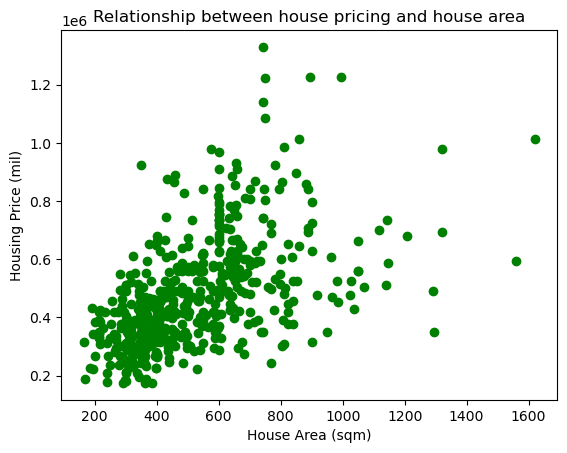

In [7]:
# scatter plot 
plt.scatter(housingPrice['House Area (sqm)'], housingPrice['Price ($)'], color='green')
plt.title('Relationship between house pricing and house area')
plt.ylabel('Housing Price (mil)')
plt.xlabel('House Area (sqm)')
plt.show()
# the scatter plot shows a linear relationship with a few outliers
# we can see that higher house area generally leads to higher housing price despite the linear relationship not being too easily seen

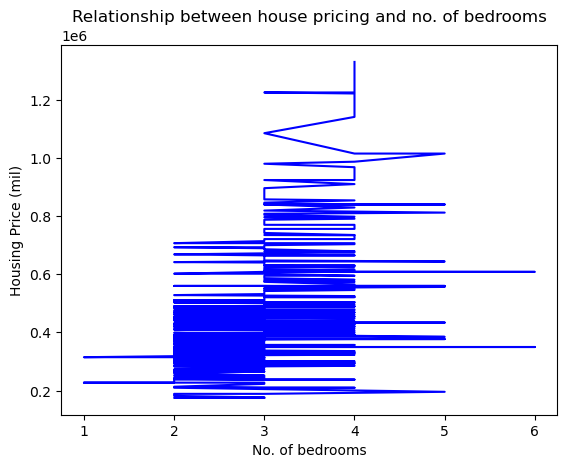

In [8]:
# line graph 
plt.plot(housingPrice['No. of Bedrooms'], housingPrice['Price ($)'], color='blue')
plt.title('Relationship between house pricing and no. of bedrooms')
plt.ylabel('Housing Price (mil)')
plt.xlabel('No. of bedrooms')
plt.show()
# while not very obvious with quite a few outliers, there is a linear relationship too
# as the number of bedrooms increase, so will the price of housing 

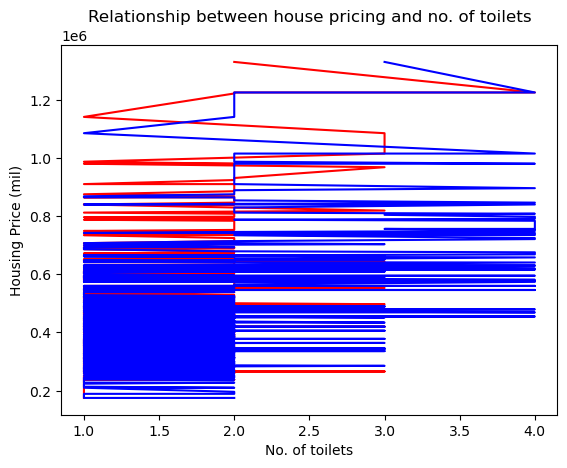

In [9]:
# line graph 
plt.plot(housingPrice['No. of Toilets'], housingPrice['Price ($)'], color='red')
plt.plot(housingPrice['Stories'], housingPrice['Price ($)'], color='blue')
plt.title('Relationship between house pricing and no. of toilets')
plt.ylabel('Housing Price (mil)')
plt.xlabel('No. of toilets')
plt.show()
# while not being very clear, there is a slight linear relationship
# as the number of stories/toilets in the house increase, so will the price of housing 

In [1]:
### House Area is seen to be the factor affecting the house pricing the most 
# The CLEAREST and MOST OBVIOUS linear relationship is seen in the scatter plot of house area and house pricing 
# The higher the amount of house area, the higher the pricing of the house 
# Hence, we can deduce that house area affects the house pricing the most

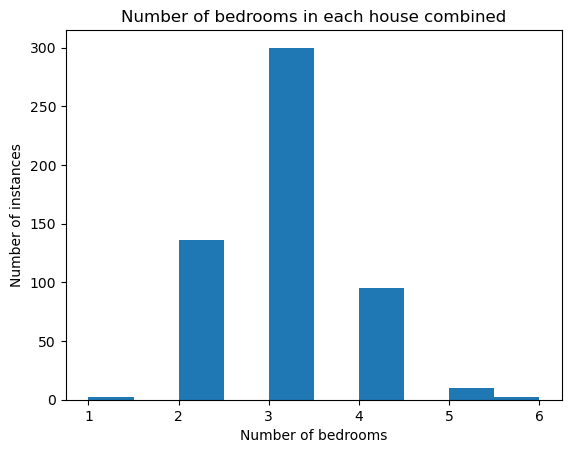

In [10]:
# histogram
plt.hist(housingPrice['No. of Bedrooms'])
plt.title('Number of bedrooms in each house combined')
plt.xlabel('Number of bedrooms')
plt.ylabel('Number of instances')
plt.show()
# majority of the rows of data have 3 bedrooms, suggesting that  the number of bedrooms is skewed towards the centre and not evenly spread out
# This may lead to the model having insufficient data to learn to deal with data with more or less than 3 bedrooms.

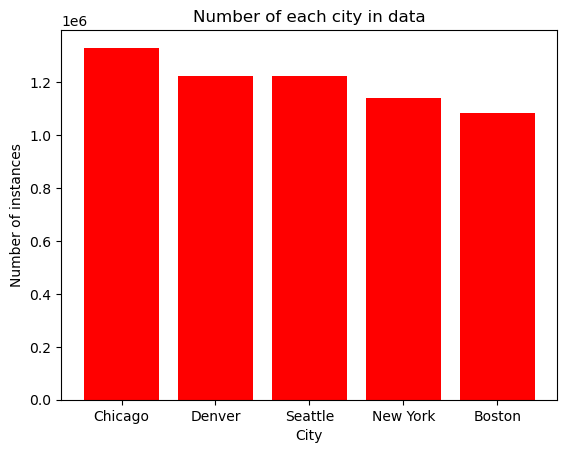

In [11]:
# histogram 
plt.bar(housingPrice['City'], housingPrice['Price ($)'],color='r')
plt.title('Number of each city in data')
plt.xlabel('City')
plt.ylabel('Number of instances')
plt.show()
# we can see that the number of instances of each city is quite evenly spread out compared to the rest
# so the model will know how each city affects house pricing equally well as there is enough data for it to learn to do so

# 4) Preparing Data

In [12]:
# .isnull()sum() to view sum of number of missing data 
housingPrice.isnull().sum()
# no need to clean data as there are no rows with missing data

House ID             0
City                 0
House Area (sqm)     0
No. of Bedrooms      0
No. of Toilets       0
Stories              0
Renovation Status    0
Price ($)            0
dtype: int64

In [13]:
# first 5 rows of dataset 
housingPrice.head()
# we can see that House ID is data that is not useful so we will drop that column

,House ID,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($)
0,0,Chicago,742.0,4,2,3,furnished,1330000
1,1,Denver,896.0,4,4,4,furnished,1225000
2,2,Chicago,996.0,3,2,2,semi-furnished,1225000
3,3,Seattle,750.0,4,2,2,furnished,1221500
4,4,New York,742.0,4,1,2,furnished,1141000


In [14]:
# drop 'House ID' column 
housingPrice.drop( ['House ID'], axis=1, inplace=True )
housingPrice.head()
# verify that it is dropped
# now to encode City and Renovation Status column into intergers 
# this is because model can only train on numerical data 

,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($)
0,Chicago,742.0,4,2,3,furnished,1330000
1,Denver,896.0,4,4,4,furnished,1225000
2,Chicago,996.0,3,2,2,semi-furnished,1225000
3,Seattle,750.0,4,2,2,furnished,1221500
4,New York,742.0,4,1,2,furnished,1141000


In [15]:
# label encoding for 'Renovation Status' column 
# label encoding used as there is order : unfurnished, semi furnished, furnished --> in the order from least to most likely to increase house pricing
housingPrice['Renovation Status'] = housingPrice['Renovation Status'].map({'unfurnished':0, 'semi-furnished':1, 'furnished':2})

# one hot encoding for 'City' column as there is no order
housingPrice = pd.get_dummies(housingPrice, columns=['City'])

# after encoding, check that the columns have been encoded
# true or false can be used to train model as True, False can be expressed as 1, 0
print('After dummy variable encoding for City and label variable encoding for Renovation Status, \nthe new table looks like this (first 5 rows) :\n', housingPrice.head())

After dummy variable encoding for City and label variable encoding for Renovation Status, 
the new table looks like this (first 5 rows) :
    House Area (sqm)  No. of Bedrooms  No. of Toilets  Stories  \
0             742.0                4               2        3   
1             896.0                4               4        4   
2             996.0                3               2        2   
3             750.0                4               2        2   
4             742.0                4               1        2   

   Renovation Status  Price ($)  City_Boston  City_Chicago  City_Denver  \
0                  2    1330000        False          True        False   
1                  2    1225000        False         False         True   
2                  1    1225000        False          True        False   
3                  2    1221500        False         False        False   
4                  2    1141000        False         False        False   

   City_New York  C

In [16]:
# seperating data into data and targets (X is all the data, y is target)
X = housingPrice.drop(['Price ($)'], axis=1).values
y = housingPrice['Price ($)'] 

In [17]:
# train test split : train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
# X_test and y_test is test data and target

print('Testing data :', X_test.shape, y_test.shape)

Testing data : (109, 10) (109,)


In [18]:
# train test split : further split the train set into a new train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# X_train and y_train is training data and target
# X_val and y_test is validatin data and target

print('Training data :',X_train.shape, y_train.shape)
print('Validation data :', X_val.shape, y_val.shape)

Training data : (348, 10) (348,)
Validation data : (88, 10) (88,)


# 5) Machine Learning Models 

In [19]:
# models 
models = {
    'Linear Regression' : LinearRegression(),
    # Reason : Handles linearly separable data well in case the data provides a clear linear relationship to suggest price og housing following a linear pattern.
    'Lasso' : Lasso(),
    # Reason : Uses L1 regularization technique, which shrinks coefficients of less important features, this helps to simplify the model making it less likely to overfit, especially when there is a lot of features in the dataset like this one.
    'Decision Tree' : DecisionTreeRegressor(),
    # Reason : Handles non-linear relationships well in case there is no linear pattern to be found that helps with predicting price.
    'Random Forest' : RandomForestRegressor(),
    # Reason : Reduces overfitting compared to individual tree and has better generalization and accuracy in non-linear data, incase there is overfitting and incase there is non-linear relations.
    'Gradient Boosting' : GradientBoostingRegressor(),
    # Reason : Works well with both structured and not that structured data, and that it is more accurate but more diffnicult to uderstand.
    'KNN' : KNeighborsRegressor()
    # Reason : Adapts well to patterns in data to look for patterns in predicting house pricing.
}

# defining kfold 
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# cross validating models with validation data to compare models as it is more accurate than just.fit()
for name, model in models.items():
    
    # r2 score calculation
    # use R^2 to determine how well the model explains the variance in the target variable, in this case, is the house pricing
    # higher r^2 score is better
    r2score = cross_val_score(model, X_train, y_train, cv=kf)
    avg_r2_score = r2score.mean()

    # mse score calculation
    # use MSE to view how far away the models predictions are from the actual price, lower value means less error
    neg_mse_score = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    mse_score = -neg_mse_score

    # rmse score calculation
    # RMSE to have a smaller number that is easier to view which does the same thing as MSE, smaller value means less error
    rmse_score = np.sqrt(mse_score)

    # avg rmse score calculation as rmse is not averaged yet in the 10 folds
    avg_rmse_score = rmse_score.mean()

    # avg mse_score calculation as mse is not averaged yet in the 10 folds
    avg_mse_score = mse_score.mean()

    # printing scores
    print(f'{name} :\nR^2 score = {100*avg_r2_score:.2f}%,\nMSE = {avg_mse_score:.2f},\nRMSE = {avg_rmse_score:.2f}\n')

Linear Regression :
R^2 score = 51.41%,
MSE = 13730564468.57,
RMSE = 114869.72

Lasso :
R^2 score = 51.42%,
MSE = 13730431190.19,
RMSE = 114869.03

Decision Tree :
R^2 score = 14.24%,
MSE = 22920944461.27,
RMSE = 149609.69

Random Forest :
R^2 score = 48.67%,
MSE = 14906803945.47,
RMSE = 118858.40

Gradient Boosting :
R^2 score = 49.24%,
MSE = 14850580941.49,
RMSE = 117508.71

KNN :
R^2 score = 25.41%,
MSE = 21289633618.85,
RMSE = 141813.41



# Model Selection 
Since there is no clear model that performs the best, as some models have very close r2, mse and rmse scores, we cannot say that the model with the highest r2 score, and lowest mse and rmse score is the best model as the difference in performance is only abit and that the best performing model differs in every run. Hence, we will take the top 4 with the lowest RMSE score to tune its hyperparameter and then compare again.

# 6) Hyperparameter Tuning

In [20]:
# define hyperparameters to tune
# random forest (rf), linear regression (lr), lasso (lasso)
# names in bracket above is short form for naming variables for each model
params_RF = {
    'n_estimators' : [100, 300, 500],
    'min_samples_leaf' : [1, 3, 5], 
    'min_samples_split' : [2, 5, 7], 
    'bootstrap' : [True, False]             
}

params_LR = {
    'fit_intercept' : [True, False],
    'copy_X' : [True, False], 
    'positive' : [True, False]
}

params_Lasso = {
    'alpha' : np.logspace(-4, 2, 100),
    'fit_intercept' : [True, False], 
    'max_iter' : [50, 100, 200, 300, 400, 500], 
    'positive' : [True, False],
    'copy_X' : [True, False]
}

params_GB = {
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 2, 5, 10],
    'min_samples_split': [2, 5, 10],
}

In [21]:
# tuning random forest and fitting with train data using best parameters
rf = RandomForestRegressor() 
rf_grid = GridSearchCV(estimator=rf, param_grid=params_RF, cv=10, verbose=3, n_jobs=-1) 
rf_grid.fit(X_train, y_train)

# tuned rf 
tuned_rf = rf_grid.best_estimator_

# predicting based on validation data
rf_pred = rf_grid.predict(X_val)

# calculating r2, mse and rmse and printing results
rf_r2 = r2_score(y_val, rf_pred)
rf_mse = mean_squared_error(y_val, rf_pred)
rf_rmse = np.sqrt(rf_mse)
print(f'\nRandom Forest :\nR^2 score -> {100*rf_r2:.2f}%\nMSE -> {rf_mse:.2f}\nRMSE -> {rf_rmse:.2f}')

Fitting 10 folds for each of 54 candidates, totalling 540 fits

Random Forest :
R^2 score -> 55.09%
MSE -> 13847728585.80
RMSE -> 117676.37


In [22]:
# tuning linear regression and fitting with train data using best parameters
lr = LinearRegression()
lr_grid = GridSearchCV(estimator=lr, param_grid=params_LR, cv=10, verbose=3, n_jobs=-1) 
lr_grid.fit(X_train, y_train)

# predicting based on validation data
lr_pred = lr_grid.predict(X_val)

# calculating r2, mse and rmse and printing results
lr_r2 = r2_score(y_val, lr_pred)
lr_mse = mean_squared_error(y_val, lr_pred)
lr_rmse = np.sqrt(lr_mse)
print(f'\nLinear Regression :\nR^2 score -> {100*lr_r2:.2f}%\nMSE -> {lr_mse:.2f}\nRMSE -> {lr_rmse:.2f}')

Fitting 10 folds for each of 8 candidates, totalling 80 fits

Linear Regression :
R^2 score -> 47.77%
MSE -> 16104670608.51
RMSE -> 126904.18


In [23]:
# tuning lasso and fitting with train data using best parameters
lasso = Lasso()
lasso_grid = GridSearchCV(estimator=lasso, param_grid=params_Lasso, cv=10, verbose=3, n_jobs=-1) 
lasso_grid.fit(X_train, y_train)

# predicting based on validation data
lasso_pred = lasso_grid.predict(X_val)

# calculating r2, mse and rmse and printing results
lasso_r2 = r2_score(y_val, lasso_pred)
lasso_mse = mean_squared_error(y_val, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
print(f'\nLasso :\nR^2 score -> {100*lasso_r2:.2f}%\nMSE -> {lasso_mse:.2f}\nRMSE -> {lasso_rmse:.2f}')

Fitting 10 folds for each of 4800 candidates, totalling 48000 fits

Lasso :
R^2 score -> 47.81%
MSE -> 16091944203.14
RMSE -> 126854.03


In [24]:
# tuning gradient boosting and fitting with train data using best parameters
gb = GradientBoostingRegressor()
gb_grid = GridSearchCV(estimator=gb, param_grid=params_GB, cv=10, verbose=3, n_jobs=-1) 
gb_grid.fit(X_train, y_train)

# predicting based on validation data
gb_pred = gb_grid.predict(X_val)

# calculating r2, mse and rmse and printing results
gb_r2 = r2_score(y_val, gb_pred)
gb_mse = mean_squared_error(y_val, gb_pred)
gb_rmse = np.sqrt(gb_mse)
print(f'\nGradient Boosting :\nR^2 score -> {100*gb_r2:.2f}%\nMSE -> {gb_mse:.2f}\nRMSE -> {gb_rmse:.2f}')

Fitting 10 folds for each of 324 candidates, totalling 3240 fits

Gradient Boosting :
R^2 score -> 49.10%
MSE -> 15693818495.20
RMSE -> 125274.97


In [25]:
# merging training data with validation data
# this makes the training data even bigger and with more data, the model can trained better 
X_train = np.concatenate((X_train, X_val))
y_train = np.concatenate((y_train, y_val))
# we will then train the final model with this new training data and test it using the testing data

# 7) Final 2 Model's Performance

In [27]:
# evaluating Lasso on test data
best_model = lasso_grid.best_estimator_ 
best_model.fit(X_train, y_train)
bm_pred = best_model.predict(X_test)

# bm r2, mse and rmse score
bm_r2 = r2_score(y_test, bm_pred)
bm_mse = mean_squared_error(y_test, bm_pred)
bm_rmse = math.sqrt(bm_mse)

# printing evaluation
print('Model Performance (Lasso)\n')
print(f'R^2 Score = {100*bm_r2:.2f}%')
print('MSE Score = {:.2f}'.format(bm_mse))
print('RMSE Score = {:.2f}'.format(bm_rmse))

Model Performance (Lasso)

R^2 Score = 51.89%
MSE Score = 24317404302.69
RMSE Score = 155940.39


In [28]:
# evaluating Random Forest on test data 
best_model = rf_grid.best_estimator_ 
best_model.fit(X_train, y_train)
bm_pred = best_model.predict(X_test)

# bm r2, mse and rmse score
bm_r2 = r2_score(y_test, bm_pred)
bm_mse = mean_squared_error(y_test, bm_pred)
bm_rmse = math.sqrt(bm_mse)

# printing evaluation
print('Model Performance (Random Forest)\n')
print(f'R^2 Score = {100*bm_r2:.2f}%')
print('MSE Score = {:.2f}'.format(bm_mse))
print('RMSE Score = {:.2f}'.format(bm_rmse))

Model Performance (Random Forest)

R^2 Score = 49.30%
MSE Score = 25626498225.69
RMSE Score = 160082.79


# Final Model 
Lasso will be chosen as the final model because Lasso has a higher R^2 value and a smaller RMSE compared to Random Forest. This model will be used to compare with a dummy baseline.

# 8) Dummy

In [26]:
# dummy regressor for comparison with final model
dummy = DummyRegressor()
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# r^2 score, mse and rmse of dummy
dummy_r2 = r2_score(y_test, dummy_pred)
dummy_mse = mean_squared_error(y_test, dummy_pred)
dummy_rmse = np.sqrt(dummy_mse)

# printing results
print(f'DummyRegressor :\nR^2 score -> {100*dummy_r2:.2f}%\nMSE -> {dummy_mse:.2f}\nRMSE -> {dummy_rmse:.2f}')

DummyRegressor :
R^2 score -> -1.79%
MSE -> 51451768522.26
RMSE -> 226829.82


# Conclusion 
In conclusion, the best model to be used to predict housing price based on the data given is Lasso. When compared to the dummy, Lasso did way much more better as the dummy constantly had a negative R-square score with a large RMSE. The dummy always predicts the mean of all the prices hence it performed very badly with the large variation of prices of the house pricing.